# Pyber Ride Sharing

#### Analysis

+ Rural Areas had less drivers and riders of Pyber ride sharing, but no well defined trend in relationship to average fare.  This could possibly be explained by varying distances of rides in rural areas or the supply of drivers in rural areas.  It doesn't seem to be the case that the number of drivers in rural areas correlates to average fare, but drivers in rural areas only make up 1% of the total drivers while rural areas account for roughly 6% of total fares and rides.  We also see data points for average fare well above what is experienced in the city.  
+ In general, the number of drivers seems to increase with city classification with rural areas having the least amount of drivers per city and urban areas having more.  There are, however, data points for urban areas that have similar nuber of drivers.  Perhaps a study of population or geographic size versus number of drivers would be beneficial in exploring this trend.
+ There seems to be a negative relationship between the number of rides and the average fare.  This is more well defined for the suburban and urban city classifications.  This might be explained by the supply of drivers or the average distance a rider is travelling in these cities.  Average travel distance might be wirth exploring further.  However, if you examine the pie chart, you can observe that cities make up for 63% and 68% of total fare and rides repectively, but the number of drivers in the city is 86.2% of the total drivers.  It is possible that there is an over supply or drivers in these cities causing lower prices.  A similar, but less dramatic trend is seen with suburban areas.  Additionally, when examining the bubble chart for cities, cities with a smaller number of drivers do seem to have a higher average fare in general.  This is trend is not as well defined with suburban areas.  Again, a comparision to of driver per capita may be helpful.  


In [11]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
# import file using pandas

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')


In [13]:
#merged_df.head()

In [14]:
#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
# sns.palplot(sns.color_palette(color_scheme.values()))
# plt.show()

## Bubble Plot of Ride Sharing Data

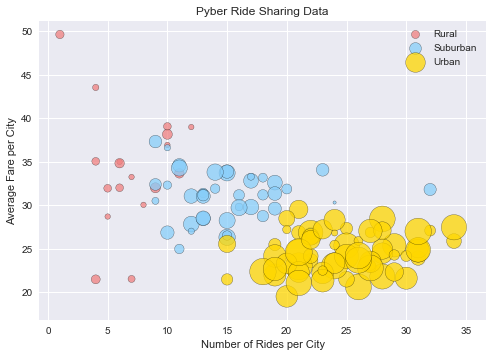

In [15]:
#group be city name
by_city = merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.legend()

plt.show()



## Total Fares by City Type

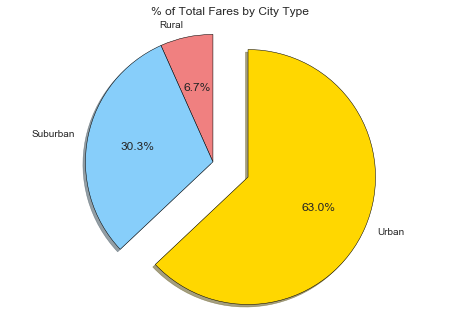

In [8]:
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

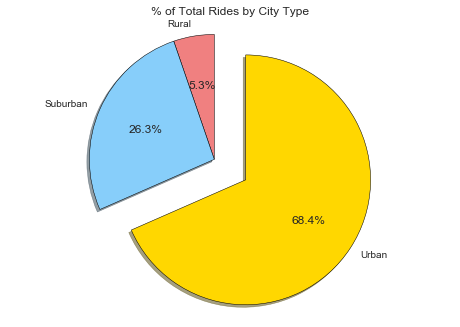

In [9]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## Drivers by City Type

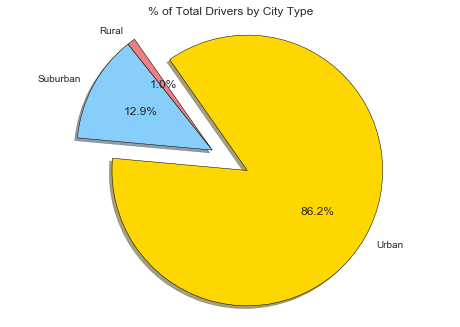

In [10]:
# of driver per city type
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()